In [3]:
import pandas as pd
import reverse_geocoder as rg
import numpy as np
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim 
from googletrans import Translator, constants
translator = Translator()
geolocator = Nominatim(user_agent="geoapiExercises")

# Data cleaning & merging

In [4]:
full_combined_dataset = pd.read_csv('clean_data.csv', delimiter=',', encoding="utf-8")
full_combined_dataset = full_combined_dataset.drop(columns=full_combined_dataset.columns[0])

print(full_combined_dataset)

       Latitude  Longitude   Depth  Magnitude  Month   Day    Year  \
0       19.2460   145.6160  131.60        6.0      1   2.0  1965.0   
1       53.0080  -162.0080   17.80        6.4      2   6.0  1965.0   
2       53.1910  -161.8590   22.50        6.3      2   6.0  1965.0   
3       21.5270   143.0810  340.00        5.6      2  17.0  1965.0   
4       53.2920  -162.3310   20.00        5.7      3  13.0  1965.0   
...         ...        ...     ...        ...    ...   ...     ...   
18720    6.1142   -82.5906   10.00        5.6     11  12.0  2016.0   
18721  -35.2021    54.0219   10.00        5.5     12   1.0  2016.0   
18722   11.0316   -60.9005   31.75        5.9     12   6.0  2016.0   
18723  -10.1785   160.9149   10.00        6.0     12  20.0  2016.0   
18724  -10.1549   160.7816   10.38        5.5     12  20.0  2016.0   

         Country Name  Density  Population  
0       United States       21   194303000  
1       United States       21   194303000  
2       United States   

In [5]:
X = full_combined_dataset.iloc[:, [0,1,2,3,6,8,9]].values

In [6]:
print(X)
data = X

[[ 1.9246000e+01  1.4561600e+02  1.3160000e+02 ...  1.9650000e+03
   2.1000000e+01  1.9430300e+08]
 [ 5.3008000e+01 -1.6200800e+02  1.7800000e+01 ...  1.9650000e+03
   2.1000000e+01  1.9430300e+08]
 [ 5.3191000e+01 -1.6185900e+02  2.2500000e+01 ...  1.9650000e+03
   2.1000000e+01  1.9430300e+08]
 ...
 [ 1.1031600e+01 -6.0900500e+01  3.1750000e+01 ...  2.0160000e+03
   2.7100000e+02  6.5595565e+07]
 [-1.0178500e+01  1.6091490e+02  1.0000000e+01 ...  2.0160000e+03
   1.3500000e+02  6.8971331e+07]
 [-1.0154900e+01  1.6078160e+02  1.0380000e+01 ...  2.0160000e+03
   1.3500000e+02  6.8971331e+07]]


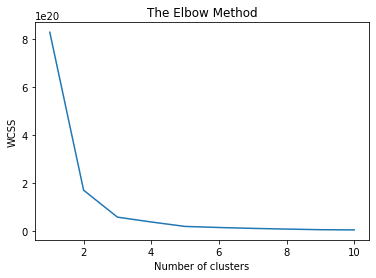

In [15]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) # X = combined dataset
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
# from sklearn.cluster import AgglomerativeClustering
# hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
# y_hc = hc.fit_predict(X)

In [1]:
kmeans = KMeans(init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

NameError: name 'KMeans' is not defined

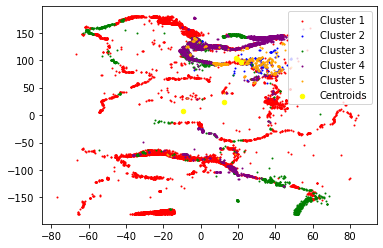

In [21]:
# kplot = plt.axes(projection='3d')
# xline = np.linspace(0, 15, 1000)
# yline = np.linspace(0, 15, 1000)
# zline = np.linspace(0, 15, 1000)
# kplot.plot3D(xline, yline, zline, 'black')
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 1, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 1, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 1, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 1, c = 'purple', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 1, c = 'orange', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

In [14]:
kmeans.cluster_centers_[1]


array([   2.15102185,  129.23476463,   44.22942115,    5.89088529,
       1992.75095821])

In [22]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X,y_kmeans)
print(score)

0.7318263595359425
